In [77]:
import json
import os
import shutil

my_dicts,run_names = [], []
for file in os.listdir():
    if "nw_metrics" in file and '.txt' in file:
        lines = []
        with open(file,'r') as f:
            for line in f.readlines():
                line = line.replace('\'','\"')
                lines.append(line)
        new_file_name = file.replace('.txt','.json')
        with open(new_file_name,'w') as f:
            f.writelines(lines)
        dict = json.load(open(new_file_name))
        my_dicts.append(dict)        
        run_names.append(new_file_name.split(".json")[0])

In [82]:
import pandas as pd
df = pd.concat([pd.Series(d) for d in my_dicts], axis=1).fillna(0).T
df.index = run_names
df = df.sort_values("batch_size")
df["Normalized_runtime[ms]"] = df["runtime[ms]"]/df["batch_size"]
df.to_csv("Bs_run_metrics_conv.csv")

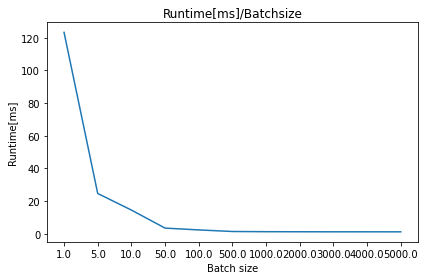

In [96]:
import matplotlib.pyplot as plt
x = df['batch_size']
y = df['Normalized_runtime[ms]']
a = range(len(x))
plt.plot(a,y*1000)
plt.xticks(a,x)
plt.tight_layout()
plt.title('Runtime[ms]/Batchsize')
plt.ylabel("Runtime[ms]")
plt.xlabel("Batch size")
plt.tight_layout()
plt.savefig("Normalized_runtime.png",facecolor='w')
plt.show()